In [3]:
#preparing dataset

import numpy as np
import pandas as pd
from bieg import ICAManager
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.stats import mode
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.externals import joblib

from sklearn.model_selection import cross_val_score

from bak_sys_ver2 import BakardjianSystem

class FFT_classifiers(object):
    pass

    def __init__(self,classes='two_classes',seconds=1):
        self.self = self
        self.classes = classes
        self.seconds = seconds
        
    def prepare_dataset(self):
        """This function prepares dataset for classifiers. """
        
        dataset = []
        
        if self.classes == 'two_classes':
        
            for n,m in zip(['8','14'],[0,1]):
                for subject in range(1,5):
                    for trial in range(1,6):
                        for part in range(round(15/self.seconds)):
                            file = 'subject%i/sd%sHz%isec/%sHz%isec%iprt%itrial.csv' %(subject,n,self.seconds,
                                                                              n,self.seconds,part,trial)
                            bs = BakardjianSystem(file,classes='two_classes')
                            bs.prep_data_extract_components()
                            bs.extract_FFT()
                            dataset.append([bs.features[0],bs.features[1],m])
                        
            self.dataset = np.array(dataset)
            self.features = self.dataset[:,[0,1]]
            
            self.target = self.dataset[:,[2]]
        
        if self.classes == 'three_classes':
        
            for n,m in zip(['8','14','28'],[0,1,2]):
                for subject in range(1,5):
                    for trial in range(1,6):
                        for part in range(round(15/self.seconds)):
                            file = 'subject%i/sd%sHz%isec/%sHz%isec%iprt%itrial.csv' %(subject,n,self.seconds,
                                                                              n,self.seconds,part,trial)
                        bs = BakardjianSystem(file,classes=self.classes)
                        bs.prep_data_extract_components()
                        bs.extract_FFT()
                        dataset.append([bs.features[0],bs.features[1],bs.features[2],m])
                        
            self.dataset = np.array(dataset)
            self.features = self.dataset[:,[0,1,2]]
            
            self.target = self.dataset[:,[3]]
            
        
        if self.classes == 'two_classes2':
        
            for n,m in zip(['8','14','28'],[0,0,1]):
                for subject in range(1,5):
                    for trial in range(1,6):
                        for part in range(round(15/self.seconds)):
                            file = 'subject%i/sd%sHz%isec/%sHz%isec%iprt%itrial.csv' %(subject,n,self.seconds,
                                                                              n,self.seconds,part,trial)
                        bs = BakardjianSystem(file,classes='three_classes')
                        bs.prep_data_extract_components()
                        bs.extract_FFT()
                        dataset.append([bs.features[0],bs.features[1],bs.features[2],m])
                        
            self.dataset = np.array(dataset)
            self.features = self.dataset[:,[0,1,2]]
            
            self.target = self.dataset[:,[3]]
            
    def SVM(self,kernel='linear',c=1,gamma=1,cv = 3):
        
        features = self.features
        target = self.target
        
        if self.classes == 'two_classes' or self.classes == 'two_classes2':
            
            scaler = MinMaxScaler(feature_range=(0,1))
            scaler.fit(features)
            scaled = scaler.transform(features)
            
            svc = SVC(kernel=kernel,C=c,gamma=gamma)
            svc.fit(scaled,target.ravel())
            
            self.svmscore = np.mean(cross_val_score(svc,scaled,target.ravel(),cv = cv))
            
        if self.classes == 'three_classes':
            
            scaler = MinMaxScaler(feature_range=(0,1))
            scaler.fit(features)
            scaled = scaler.transform(features)
            
            svc = SVC(kernel=self.kernel,C=self.c,gamma=self.gamma,decision_function_shape='ovo')
            
            self.svmscore = np.mean(cross_val_score(svc,scaled,target.ravel(),cv = cv))
            
        self.svc = svc
            
    def KNN(self,n_neighbours = 3,cv = 3):
        
        features = self.features
        target = self.target
        
        if self.classes == 'two_classes' or self.classes == 'two_classes2':
            
            knn = KNeighborsClassifier(algorithm='kd_tree',n_neighbors=3)
            knn.fit(features,target.ravel())
            
            self.knnscore = np.mean(cross_val_score(knn,features,target.ravel(),cv = cv))
            
        if self.classes == 'three_classes':
            
            knn = KNeighborsClassifier(n_neighbors=self.n_neighbours)
            
            self.knnscore = np.mean(cross_val_score(knn,features,target.ravel(),cv = cv))
            
        self.knn = knn
        
if __name__ == '__main__':
    fft = FFT_classifiers(classes='two_classes')
    fft.prepare_dataset()
    fft.SVM('linear',1,1)
    print(fft.svmscore)
    fft.KNN(3,3)
    print(fft.knnscore)

# ds0 = [dataset[n][0:2] for n in range(len(dataset)) if dataset[n][2] == 0]
# ds1 = [dataset[n][0:2] for n in range(len(dataset)) if dataset[n][2] == 1]
# dataset

#To Do:
# Simpilfy the code

0.5
0.75


In [6]:
fft.svc.coef_

array([-1.95358583, -0.30104343])

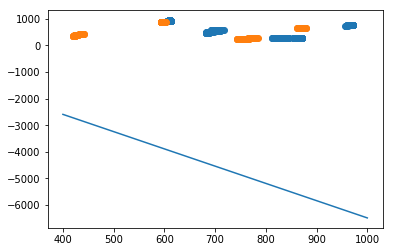

In [10]:


# Plotting a maximum margin for linear model
dataset = fft.dataset
# ds0 = [dataset[n][0:3] for n in range(len(dataset)) if dataset[n][3] == 0]
# ds1 = [dataset[n][0:3] for n in range(len(dataset)) if dataset[n][3] == 1]
# ds3 = [dataset[n][0:3] for n in range(len(dataset)) if dataset[n][3] == 2]


ds0 = [dataset[n][0:2] for n in range(len(dataset)) if dataset[n][2] == 0]
ds1 = [dataset[n][0:2] for n in range(len(dataset)) if dataset[n][2] == 1]


w = fft.svc.coef_[0]
a = -w[0] /w[1]
xx = np.linspace(400,1000)
yy = a * xx - (fft.svc.intercept_[0] / w[1])
plt.scatter(np.array(ds0[:])[:,0],np.array(ds0[:])[:,1])
plt.scatter(np.array(ds1[:])[:,0],np.array(ds1[:])[:,1])
# plt.scatter(np.array(ds3[:])[:,0],np.array(ds3[:])[:,1])
plt.plot(xx,yy)
plt.show()


In [2]:


# dataset = []

# for n,m in zip(['8','14'],[0,1]):
#     for subject in range(1,5):
#         for part in range(15):
#             file = 'subject%s/sd%sHz1sec/%sHz1sec%sprt.csv' %(str(subject),str(n),str(n),str(part))
#             bs = BakardjianSystem(file,classes='two_classes')
#             bs.prep_data_extract_components()
#             bs.extract_FFT()
#             dataset.append([bs.features[0],bs.features[1],m])


# features = np.array(dataset)[:,[0,1]]
# target = np.array(dataset)[:,[2]]



# scaler = MinMaxScaler()
# scaler.fit(features)
# scaled = scaler.transform(features)

        

# X_train,X_test,y_train,y_test = train_test_split(features,target)

# X_trains,X_tests,y_trains,y_tests = train_test_split(scaled,target)
# Support Vector Machine \

# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import LeaveOneOut


# svc = SVC(kernel='linear',C=1)

# linsvc = svc.fit(X_train,y_train.ravel())
# print(np.mean(cross_val_score(linsvc,features,target.ravel(),cv=6)))
# joblib.dump(linsvc,'linsvc.pkl')

# svc = SVC(kernel='rbf',C=1)

# rbfsvc = svc.fit(X_train,np.ravel(y_train))
# print(np.mean(cross_val_score(rbfsvc,features,target.ravel(),cv=6)))
# joblib.dump(rbfsvc,'rbfsvc.pkl')


In [3]:


# rbfsvcs = SVC(kernel='rbf')

# rbfsvcs = rbfsvcs.fit(X_trains,np.ravel(y_trains))
# print(rbfsvcs.score(X_tests,y_tests))
# joblib.dump(rbfsvcs,'rbfsvcs.pkl')

# svc = SVC(kernel='linear')

# linsvcs = svc.fit(X_trains,y_trains.ravel())
# print(linsvcs.score(X_tests,y_tests))
# joblib.dump(linsvcs,'linsvcs.pkl')


In [4]:


# knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit(X_train,np.ravel(y_train))
# knn.score(X_test,y_test)

# # plt.scatter(features[:,[0]], features[:,[1]])
# # plt.show()


In [2]:

# """
# This file is containing a class, that perform all modules for 
# Hovagim Bakardjian system that serves for feature extraction and command
# classification in SSVEP based BCI. 
# Version 2
# """

# import numpy as np
# import pandas as pd
# from bieg import ICAManager
# import matplotlib.pyplot as plt
# import scipy.signal as sig
# from scipy.stats import mode


# class BakardjianSystem(object):
    
#     def __init__(self,path,seconds=1,components_to_exclude = [0,14,27,28,127],
#                  chunk = 1,extract = False,freq = 256,classes = 'three_classes',normalize=True):

#         self.path = path
#         self.seconds = seconds
#         self.ica_file = ICAManager(input_path=self.path,method='fastica',sep=' ')
#         self.components_to_exclude = components_to_exclude
#         self.extract = extract
#         self.freq = freq
#         self.classes = classes
#         self.normalize = normalize
        
#     def prep_data_extract_components(self):
        
#         self.ica_file.load_data()
        
#         if self.extract == True:
#             self.ica_file.extract_components()
#             self.ica_file.exclude_ica_components(
#                 components_to_exclude=self.components_to_exclude)
        
#         self.data = self.ica_file.data
#         self.o1 = self.data[15]
#         self.oz = self.data[23]
#         self.o2 = self.data[28]


# class BakardjianSystemFFT(object):
    
#     def __init__(self,path,seconds=1,components_to_exclude = [0,14,27,28,127],
#                  extract = False,freq = 256,classes = 'three_classes',normalize=True):
#         self.path = path
#         self.seconds = seconds
#         self.freq = freq
#         self.classes = classes
        
#         baksys = BakardjianSystem(path,seconds=seconds,normalize=False,classes=classes,extract=extract)
#         baksys.prep_data_extract_components()
        
#         self.o1 = baksys.o1
#         self.oz = baksys.oz
#         self.o2 = baksys.o2
        
#     def extract_FFT(self):
        
#         if self.classes == 'two_classes':
#             array_of_freq = np.zeros(((3,2,3)))
#             for t,p in zip([self.o1,self.oz,self.o2],range(3)):
#                 result = 2*abs(np.fft.fft(sig.hamming(len(t))*t,self.freq))/self.freq

#                 for n,z in zip([[7,8,9],[13,14,15]],range(2)):
#                     for r in range(3):
#                         array_of_freq[p][z][r] = result[n[r]]
                        
#             array_of_freq_max =  np.zeros((3,2))
#             for z in range(3):
#                 for n in range(2):
#                     array_of_freq_max[z][n] = np.max(array_of_freq[z][n])
            
#             features = np.array([np.max(array_of_freq_max[:,[0]]),
#                                  np.max(array_of_freq_max[:,[1]])])
                    
#             self.features = features
        
#         if self.classes == 'three_classes':
#             array_of_freq = np.zeros(((3,3,3)))
#             for t,p in zip([self.o1,self.oz,self.o2],range(3)):
#                 result = 2*abs(np.fft.fft(sig.hamming(len(t))*t,self.freq))/self.freq

#                 for n,z in zip([[7,8,9],[13,14,15],[27,28,29]],range(3)):
#                     for r in range(3):
#                         array_of_freq[p][z][r] = result[n[r]]
                        
#             array_of_freq_max =  np.zeros((3,3))
#             for z in range(3):
#                 for n in range(3):
#                     array_of_freq_max[z][n] = np.max(array_of_freq[z][n])
            
#             features = np.array([np.max(array_of_freq_max[:,[0]]),
#                                  np.max(array_of_freq_max[:,[1]]),
#                                  np.max(array_of_freq_max[:,[2]])])
                    
#             self.features = features
            
            

# # array_of_freq_max =  np.zeros((3,3))
# # for z in range(3):
# #     for n in range(3):
# #         array_of_freq_max[z][n] = np.max(result[z][n])
            
# bs = BakardjianSystemFFT('data08Hz_1_seconds/ssvep08Hz_sec1_prt0.csv',classes='three_classes')
# bs.extract_FFT()
# bs.features

array([ 972.82993648,  764.11972582,  283.55935518])

In [56]:
class BakardjianSystemFFT(object):
    
    def __init__(self,path,seconds=1,components_to_exclude = [0,14,27,28,127],
                 extract = False,freq = 256,classes = 'three_classes',normalize=True):
        self.path = path
        self.seconds = seconds
        
        
        baksys = BakardjianSystem(path,seconds=seconds,normalize=False,classes=classes,extract=extract)
        baksys.prep_data_extract_components()
        
        self.o1 = baksys.o1
        self.oz = baksys.oz
        self.o2 = baksys.o2
        
    
    @staticmethod
    def nastepnaPotega(x):
        return 2**(x-1).bit_length()
    
#     def rysujFFT(self,sygnal):
#         dlugoscFFT=self.nastepnaPotega(len(sygnal))
#         wynik=2*abs(np.fft.fft(sig.hamming(len(sygnal))*sygnal,256))/256
#         f=np.linspace(0,200, 256)
#         plt.figure()
#         plt.plot(f,wynik)
#         plt.xlim([0,50])
#         plt.show()
#         return(wynik)
    
    def extract_FFT(self):
        array_of_features = np.zeros(((3,3,3)))
        for signal,element in zip([self.o1,self.oz,self.o2],range(3)):
            FFTlength = self.nastepnaPotega(len(signal))
            wynik = 2*abs(np.fft.fft(sig.hamming(len(signal))*signal,256))/256
            for n in range(3):
                array_of_features[n][element] = wynik[7]
                array_of_features[n][element] = wynik[8]
                array_of_features[n][element] = wynik[9]

            
        return array_of_features
            
            
def nastepnaPotega(x):
    return 2**(x-1).bit_length()
            
            
        


bs = BakardjianSystemFFT('data28Hz_1_seconds/ssvep28Hz_sec1_prt0.csv')

o1 = bs.o1

# bs.extract_FFT()



# def rysujFFT(sygnal):
#     dlugoscFFT=nastepnaPotega(len(sygnal))
#     wynik=2*abs(np.fft.fft(sig.hamming(len(sygnal))*sygnal,256))/256
#     f=np.linspace(0,200, 256)
#     plt.figure()
#     plt.plot(f,wynik)
#     plt.xlim([0,50])
#     plt.show()
#     return(wynik)

#To do: create a function that extract frequencies for just one electrode, then change it for all ones

result = np.zeros(((3,3,3)))

dlugoscFFT=nastepnaPotega(len(o1))
wynik=2*abs(np.fft.fft(sig.hamming(len(o1))*o1,256))/256

for n,z in zip([[7,8,9],[13,14,15],[27,28,29]],range(3)):
    for r in range(3):
        result[z] = n[z]
result


for t,s in zip([bs.o1,bs.oz,bs.o2],range(3)):
    
    wynik=2*abs(np.fft.fft(sig.hamming(len(t))*t,256))/256
    for n,z in zip([[7,8,9],[13,14,15],[27,28,29]],range(3)):
        for r in range(3):
            result[s][z][r] = wynik[n[r]]
result

array_of_freq_max =  np.zeros((3,3))
for z in range(3):
    for n in range(3):
        array_of_freq_max[z][n] = np.max(result[z][n])
print(array_of_freq_max)
print(result)
np.array([np.max(array_of_freq_max[:,[0]]),np.max(array_of_freq_max[:,[1]]),np.max(array_of_freq_max[:,[2]])])

[[ 908.52947197  640.85220194  294.46712104]
 [ 908.35583226  641.24734264  294.32992517]
 [ 908.74643231  641.02248846  294.47467353]]
[[[ 467.73666692  908.52947197  172.42464753]
  [ 260.75184501  640.85220194  513.78240703]
  [ 294.46712104  258.95971993   70.60169454]]

 [[ 467.78565718  908.35583226  172.49192761]
  [ 260.94392823  641.24734264  514.0419044 ]
  [ 294.32992517  258.73601331   70.57155549]]

 [[ 467.80048958  908.74643231  172.50662186]
  [ 260.92076039  641.02248846  513.86914212]
  [ 294.47467353  258.79385369   70.55222403]]]


array([ 908.74643231,  641.24734264,  294.47467353])

In [26]:



# dataset = []

# for n,m in zip(['8','14'],[0,1]):
#     for subject in range(1,5):
#         for part in range(15):
#             file = 'subject%s/sd%sHz1sec/%sHz1sec%sprt.csv' %(str(subject),str(n),str(n),str(part))
#             bs = BakardjianSystem(file,classes='two_classes')
#             bs.prep_data_extract_components()
#             bs.extract_FFT()
#             dataset.append([bs.features[0],bs.features[1],m])
        
# for n,m in zip(['08','14'],[0,1]):
#     for r in range(5):
#         file = 'data%sHz_3_seconds/ssvep%sHz_sec3_prt%i.csv' %(str(n), str(n), r)
#         bs = BakardjianSystem(file,classes='two_classes')
#         bs.prep_data_extract_components()
#         bs.extract_FFT()
#         dataset.append([bs.features[0],bs.features[1],m])
        
# for n,m in zip(['08','14'],[0,1]):
#     for r in range(3):
#         file = 'data%sHz_5_seconds/ssvep%sHz_sec5_prt%i.csv' %(str(n), str(n), r)
#         bs = BakardjianSystem(file,classes='two_classes')
#         bs.prep_data_extract_components()
#         bs.extract_FFT()
# #         dataset.append([bs.features[0],bs.features[1],m])
        
        
        
# features = np.array(dataset)[:,[0,1]]
# target = np.array(dataset)[:,[2]]






















from bak_sys import BakardjianSystem
import numpy as np
from scipy import signal as sig
import pandas as pd
import matplotlib.pyplot as plt
import aseegg as ag
from pylab import *


path_08Hz = '../data/SUBJ1/SSVEP_8Hz_Trial2_SUBJ1.csv'
path_14Hz = '../data/SUBJ1/SSVEP_14Hz_Trial1_SUBJ1.csv'
path_28Hz = '../data/SUBJ1/SSVEP_28Hz_Trial2_SUBJ1.csv'

file_08Hz = np.genfromtxt(path_08Hz,delimiter=',')[:][256*5:256*20].reshape(128,3840)
file_14Hz = np.genfromtxt(path_14Hz,delimiter=',')[:][256*5:256*20].reshape(128,3840)
file_28Hz = np.genfromtxt(path_28Hz,delimiter=',')[:][256*5:256*20].reshape(128,3840)

def prepData(path,freq):
    """This function serves preparing data"""
    file = np.genfromtxt(path_08Hz,delimiter=',')[:][256*5:256*20].reshape(128,3840)

def peaks(array):
    peak_8Hz = array 

prepData(file_08Hz,freq=8)

In [27]:
Oz_08Hz = file_08Hz[15]
Oz_14Hz = file_14Hz[15]
Oz_28Hz = file_28Hz[15]

O1_08Hz = file_08Hz[23]
O1_14Hz = file_14Hz[23]
O1_28Hz = file_28Hz[23]

O2_08Hz = file_08Hz[28]
O2_14Hz = file_14Hz[28]
O2_28Hz = file_28Hz[28]

In [28]:
fft_O1_8Hz = np.fft.fft(O1_08Hz)
fft_O2_8Hz = np.fft.fft(O2_08Hz)
fft_Oz_8Hz = np.fft.fft(Oz_08Hz)

fft_O1_14Hz = np.fft.fft(O1_14Hz)
fft_O2_14Hz = np.fft.fft(O2_14Hz)
fft_Oz_14Hz = np.fft.fft(Oz_14Hz)

fft_O1_28Hz = np.fft.fft(O1_28Hz)
fft_O2_28Hz = np.fft.fft(O2_28Hz)
fft_Oz_28Hz = np.fft.fft(Oz_28Hz)

In [29]:
fft_8Hz = (fft_O1_8Hz+fft_O2_8Hz+fft_Oz_8Hz)/3
fft_14Hz = (fft_O1_14Hz+fft_O2_14Hz+fft_Oz_14Hz)/3
fft_28Hz = (fft_O1_28Hz+fft_O2_28Hz+fft_Oz_28Hz)/3

In [31]:
peak_8Hz = max(fft_8Hz[7*256:9*256])
peak_14Hz = max(fft_14Hz[13*256:15*256])
peak_28Hz = max(fft_28Hz[27*256:29*256])


ValueError: max() arg is an empty sequence

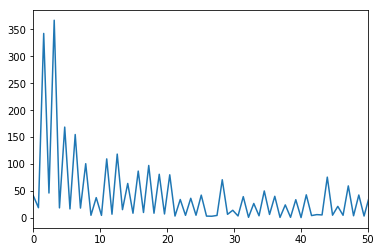

In [32]:
ag.rysujFFT(O2_14Hz)

In [35]:

def nastepnaPotega(x):
    return 2**(x-1).bit_length()

def rysujFFT(sygnal):
    dlugoscFFT=nastepnaPotega(len(sygnal))
    wynik=2*abs(np.fft.fft(sig.hamming(len(sygnal))*sygnal,256))/256
    f=np.linspace(0,200, 256)
#     plt.figure()
#     plt.plot(f,wynik)
#     plt.xlim([0,50])
#     plt.show()
    return(wynik)


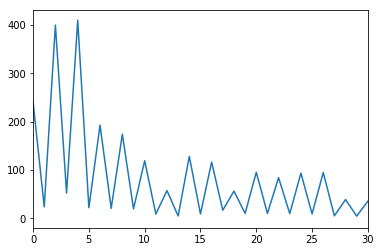

In [44]:
fft_O1 = rysujFFT(O1_08Hz)

plt.plot(fft_O1)
plt.xlim([0,30])
plt.show()


In [54]:
# fft_O1.shape
fft_O1[4]

409.98361715324427

In [7]:
2**(2-1).bit_length()

2

In [24]:
np.zeros((3,3))

0.0